# Project: Analysis Of Hospital Appointments in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



> This dataset provides data on over an hundred thousand hospital appointments in Brazil. 
> It contains various information on patient personal data and general health conditions.
> This Project aims to answer the following research questions:
> 1. Was there any difference in attendance rate of patients based on their alcoholism status?
> 2. Was there a greater attendance rate among those that were invited by SMS and those that were not?
> 3. Given the historical background of Brazil's Welfare System, was their better attendance among scholarship holders compared to others?
> 4. Were there differences in compliance rate of patients based on the degree of their handicap or disability?
> 5. What is the general patient age distribution? What is the age distribution among patients that honoured their appointments and those that did not?

#### Importing the Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing the dataset

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


<a id='wrangling'></a>
## Data Wrangling



### General Properties

#### Loading Dataset and General Overview

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#getting a general overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# checking for duplicated rows 
df.duplicated().value_counts()

False    110527
dtype: int64

> There are one hundred and ten thousand, five hundred and twenty seven(110,527) observations and 13 columns in the No-show Appointment dataset. No missing values or duplicated rows are recorded across the observations.

__*General Insights...*__

In [7]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

> Of 110,527 appointments, the vast majority (88,208) took place. Only 22,319 appointments were missed.

In [8]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

> The number of appointments with female patients(71,840) were almost double of that of the male patients(38,687).

In [9]:
df[df['No-show'] == 'No'].Gender.value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

> Of 88,208 honoured appointments, 57,246 were females and 30,962 were males

In [10]:
df[df['No-show'] == 'Yes'].Gender.value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

>Of 22,319 missed appointments, 14,594 were females and 7,725 were males

In [11]:
df.Age.mean()

37.08887421173107

> The mean age of patients was 37 years.

#### General Visualization of Some Attributes With a Histogram

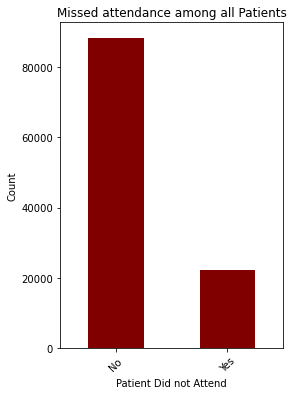

In [12]:
#Plot on the missed attendance rate among patients
df['No-show'].value_counts().plot(kind='bar', xlabel='Patient Did not Attend', ylabel='Count', title='Missed attendance among all Patients', rot=45, figsize=(4,6), color='maroon');

_Age distribution of Patients on Histogram._

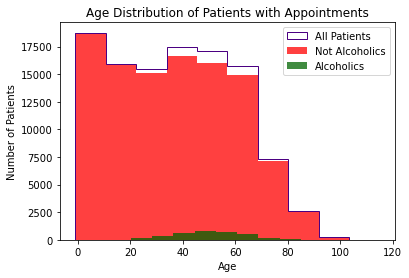

In [13]:
plt.hist(df.Age, color='indigo', alpha=1, histtype='step', label='All Patients');
plt.hist(df[df['Alcoholism'] == 0].Age, color='red', alpha=0.75, label='Not Alcoholics');
plt.hist(df[df['Alcoholism'] == 1].Age, color='darkgreen', alpha=0.75, label='Alcoholics');
plt.legend()
plt.xlabel('Age');
plt.ylabel('Number of Patients');
plt.title('Age Distribution of Patients with Appointments');

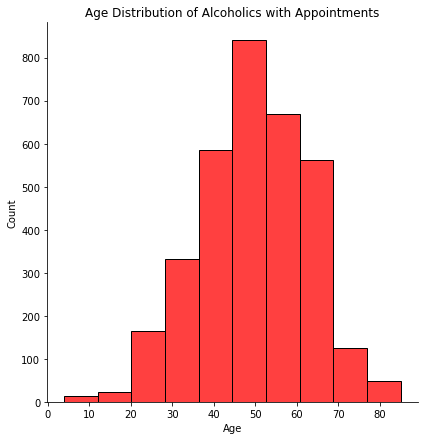

In [14]:
#Alcoholics with appointments
sns.displot(x=df[df['Alcoholism'] == 1].Age,color='red', label='Age of Patients',bins=10, height=6).set(title='Age Distribution of Alcoholics with Appointments');

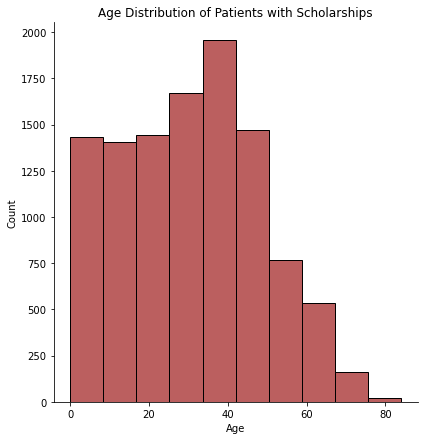

In [15]:
#scholarship holders with appointments
sns.displot(x=df[df['Scholarship'] == 1].Age,color='brown',bins=10, height=6).set(title='Age Distribution of Patients with Scholarships');

> For all patient categories, the age distribution is skewed to the right. It appears that younger people had more appointments than the elderly. 
> The distribution pattern for alcoholics shows that older alcoholics had more appointments than the younger ones.

###### Further Notes on The Dataset Structure

This project intends to further explore how some patient attributes affected their showing up to the hospital on the date of their appointments.
For this purpose, I intend to:
1. Drop the columns that I won't be using for this project. These include: PatientId, AppointmentID, ScheduledDay, AppointmentDay, Neighbourhood, Hipertension, and Diabetes.
2. Modify the column names -converting to lowercase and replacing all dashes to underscores
3. Modifying the 'No-show' data values such that 'No' has a value of 1 and 'Yes' has a value of 0.
4. Etc

### Cleaning up the dataframe: 
1. Dropping excess columns.
2. Modifying column names to lowercase and replacing dashes with underscores
3. Modifing select column values with better matching values, especially 'No-show' and 'Handcap columns.

###### 1. Dropping Excess Columns:

In [16]:
# print column names again to know which to drop
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [17]:
# create a new dataframe that contains the original dataframe but 
#with only the relevant columns that will be studied 
clean_df = df.drop(['PatientId', 'AppointmentID', 'ScheduledDay',
       'AppointmentDay','Neighbourhood', 'Hipertension',
       'Diabetes'], axis=1)
clean_df.head()


,Gender,Age,Scholarship,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,0,0,0,No
1,M,56,0,0,0,0,No
2,F,62,0,0,0,0,No
3,F,8,0,0,0,0,No
4,F,56,0,0,0,0,No


###### 2. Modify Column Names

In [18]:
clean_df.columns = clean_df.columns.str.lower()
clean_df.rename(columns={'no-show':'showed_up'}, inplace=True)
clean_df.columns

Index(['gender', 'age', 'scholarship', 'alcoholism', 'handcap', 'sms_received',
       'showed_up'],
      dtype='object')

###### 3. Convert all 'No' occurences in 'showed_up' to 'Yes' and all 'Yes' to 'No'

In [19]:
clean_df['showed_up'] = df['No-show'].replace({'No':'Yes', 'Yes': 'No'})
clean_df.showed_up.unique()

array(['Yes', 'No'], dtype=object)

###### 4. Convert values in 'alcoholic', 'sms_received and 'handcap' columns to more understandable equivalents

In [20]:
#clean_df['alcoholism'] = clean_df.alcoholism.replace({1:'Alcoholic', 0: 'Non-alcoholic'})
clean_df['handcap'] = clean_df.handcap.replace({0: 'Not disabled', 1: 'Mild disability', 2: 'Moderate disability', 3: 'Severe Disability', 4: 'Moribund'})
clean_df['sms_received'] = clean_df.sms_received.replace({1:'Yes', 0: 'No'})
clean_df.columns

Index(['gender', 'age', 'scholarship', 'alcoholism', 'handcap', 'sms_received',
       'showed_up'],
      dtype='object')

In [21]:
# general overview of counts of the individual categories of patients based on handicap.
clean_df.handcap.value_counts()

Not disabled           108286
Mild disability          2042
Moderate disability       183
Severe Disability          13
Moribund                    3
Name: handcap, dtype: int64

In [22]:
clean_df.sms_received.value_counts()

No     75045
Yes    35482
Name: sms_received, dtype: int64

In [23]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
clean_df.alcoholism.value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

In [24]:
# alcoholics and non alcoholics grouped by their compliance to clinic appointments
clean_df[clean_df['alcoholism'] == 0].showed_up.value_counts(), clean_df[clean_df['alcoholism'] == 1].showed_up.value_counts()

(Yes    85525
 No     21642
 Name: showed_up, dtype: int64,
 Yes    2683
 No      677
 Name: showed_up, dtype: int64)

<a id='eda'></a>
## Exploratory Data Analysis



### 1. Was there any difference in attendance rate of patients based on their alcoholism status?

In [25]:
# getting an overview of patient numbers based on alcoholism status
clean_df['alcoholism'].value_counts()


0    107167
1      3360
Name: alcoholism, dtype: int64

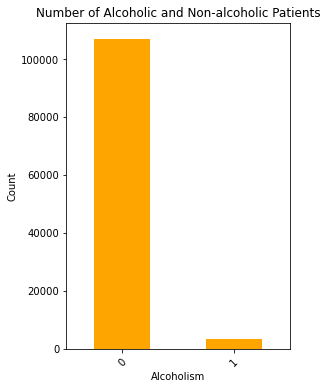

In [26]:
# visualization of the above summary information
clean_df['alcoholism'].value_counts().plot(kind='bar', xlabel='Alcoholism', ylabel='Count', title='Number of Alcoholic and Non-alcoholic Patients', rot=45, figsize=(4,6), color='orange');

 > The vast majority of patients in this sample were not alcoholics, that is over 10,000 people. 
 > Only a small number (less than five thousand are alcoholics)

###### Stacked Bar Graph Showing Percentage Attendance among Alcoholics and Non-alcoholics

In [27]:
#create function for creating a dataframe for attendance based on certain attributes in the clean_df dataframe
def makeAttendanceTable(myvalues, parentDataFrame, name_df, attribute):
    name_df = pd.DataFrame()
    name_df['Patients_with_appointments'] = myvalues
    my_v_counts = parentDataFrame[parentDataFrame['showed_up'] == 'Yes'][attribute].value_counts()
    name_df['Showed_up'] = my_v_counts.values.tolist()
    my_v_counts = clean_df[clean_df['showed_up'] == 'No'][attribute].value_counts()
    name_df['Missed_appointment'] = my_v_counts.values.tolist()
    #adding columns for proportion
    name_df['Total'] = name_df['Showed_up'] + name_df['Missed_appointment']
    name_df['Percentage_that_attended'] = name_df['Showed_up']/name_df['Total'] * 100
    name_df['Percentage_that_missed'] = 100 - name_df['Percentage_that_attended']
    return name_df
    

In [28]:
#create a dataframe that smummarizes patient alcoholism status with columns for percentages
myvalues = ['Alcoholic', 'Sober']
alcoholism_df = makeAttendanceTable(myvalues=myvalues, parentDataFrame=clean_df, name_df='alcoholism_df', attribute='alcoholism')
alcoholism_df

,Patients_with_appointments,Showed_up,Missed_appointment,Total,Percentage_that_attended,Percentage_that_missed
0,Alcoholic,85525,21642,107167,79.805351,20.194649
1,Sober,2683,677,3360,79.851190,20.148810


In [29]:
#create a function for plotting Attendance tables with barcharts
def myBarPlot(data, title, kind, color):
    myplot = data.plot(kind=kind,stacked=True, x='Patients_with_appointments', y=['Percentage_that_attended', 'Percentage_that_missed'],rot=45, color=color, ylabel='Percentage(%)', figsize=(8,4));
    myplot.set_xlabel('Percentage');
    myplot.set_title(title);

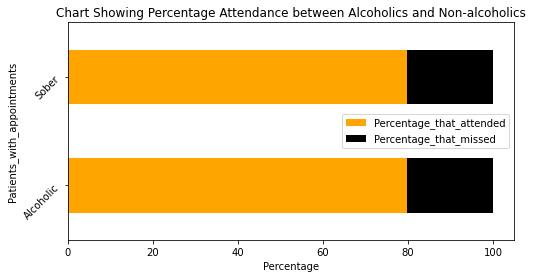

In [30]:
# Plot a bar chart to illustrate the findings
title='Chart Showing Percentage Attendance between Alcoholics and Non-alcoholics'
myBarPlot(data=alcoholism_df, title=title, kind='barh', color=['orange','black'])

> Percentage attendance among non-alcoholics was about 0.05% higher compared to patients that were alcoholics. 
> Proportionally, there was no significant difference in compliance to appointments between the alcoholic group and the other patients. 


### 2. Was there a greater attendance rate among those that were invited by SMS and thost that were not?

In [31]:
#create a dataframe with percentages that summarises attendance among patients that got a reminder and those that didn't.
myvalues = ['Were Reminded', 'Were Not Reminded']
sms_df = makeAttendanceTable(myvalues=myvalues, parentDataFrame=clean_df, name_df='sms_df', attribute='sms_received')
sms_df

,Patients_with_appointments,Showed_up,Missed_appointment,Total,Percentage_that_attended,Percentage_that_missed
0,Were Reminded,62510,12535,75045,83.296689,16.703311
1,Were Not Reminded,25698,9784,35482,72.425455,27.574545


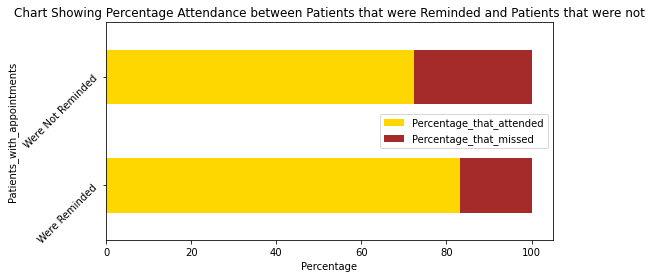

In [32]:
# Plot a bar chart to illustrate the findings
title='Chart Showing Percentage Attendance between Patients that were Reminded and Patients that were not'
myBarPlot(data=sms_df, title=title, kind='barh', color=['gold','brown'])

> Attendance was up by almost 9% in the category of patients that were reminded of their appointments by SMS compared to those that were not reminded. 

### 3. Given the historical background of Brazil's Welfare System, was their better attendance among scholarship holders compared to others?

In [33]:
#create a dataframe with percentages that summarises patient scholarship status.
myvalues = ['Patients_with_scholarships', 'Patients_without_scholarships']
scholarship_df = makeAttendanceTable(myvalues=myvalues, parentDataFrame=clean_df, name_df='sms_df', attribute='scholarship')
scholarship_df

,Patients_with_appointments,Showed_up,Missed_appointment,Total,Percentage_that_attended,Percentage_that_missed
0,Patients_with_scholarships,79925,19741,99666,80.192844,19.807156
1,Patients_without_scholarships,8283,2578,10861,76.263696,23.736304


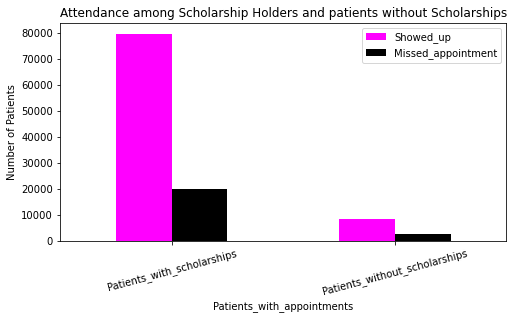

In [34]:

# A bar chart to illustrate the findings in raw numbers
anotherplt = scholarship_df.plot(kind='bar', x='Patients_with_appointments', y=['Showed_up', 'Missed_appointment'],rot=15, color=['magenta','black'], ylabel='Number of Patients', figsize=(8,4));
anotherplt.set_title('Attendance among Scholarship Holders and patients without Scholarships');

> By far, most Patients were scholarship beneficiaries. 
> A chart showing the age distribution of scholarship and non-scholarship holders among the patients will give us better insight.

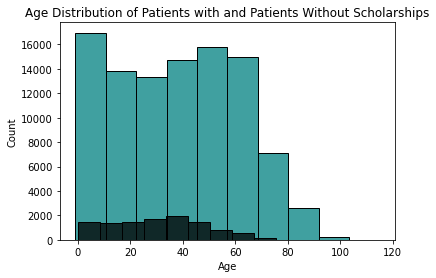

In [35]:
#age distribution of scholarship and non-scholarship

sns.histplot(x=df[df['Scholarship'] == 0].Age,color='teal', label='Age of Patients',bins=10);
sns.histplot(x=df[df['Scholarship'] == 1].Age,color='black', label='Age of Patients',bins=10).set(title='Age Distribution of Patients with and Patients Without Scholarships');

> The age distribution is similar among both categories. Important points to note:
> 1. The vast majority of patients with appointments were on a scholarship at the time.
> 2. Patients with ages 80 and above were not on scholarships.

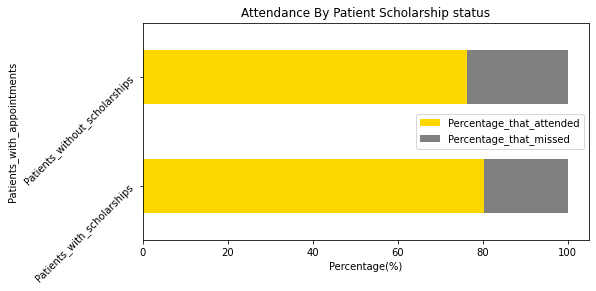

In [41]:
# Plot a bar chart with proportions to gain more accurate insight and eliminate bias
myplot = scholarship_df.plot(kind='barh',stacked=True, x='Patients_with_appointments', y=['Percentage_that_attended', 'Percentage_that_missed'],rot=45, color=['gold','grey'],title='Attendance By Patient Scholarship status', figsize=(8,4));
myplot.set_xlabel('Percentage(%)');

> There was about 4% greater attendance rate among scholarship-holders compared to their non-scholarship holding counterparts. This may have been affected by the fact that most non-scholarship holders are older patients.

### 4. Were there differences in compliance rate of patients based on the degree of their handicap or disability?

In [42]:
# create a new dataframe that classifiess patients based on their handicap(or lack of it)
myvalues = clean_df.handcap.unique()
new_handicap = makeAttendanceTable(myvalues=myvalues, parentDataFrame=clean_df, name_df='new_handicap', attribute='handcap')
new_handicap

,Patients_with_appointments,Showed_up,Missed_appointment,Total,Percentage_that_attended,Percentage_that_missed
0,Not disabled,86374,21912,108286,79.764697,20.235303
1,Mild disability,1676,366,2042,82.076396,17.923604
2,Moderate disability,146,37,183,79.781421,20.218579
3,Severe Disability,10,3,13,76.923077,23.076923
4,Moribund,2,1,3,66.666667,33.333333


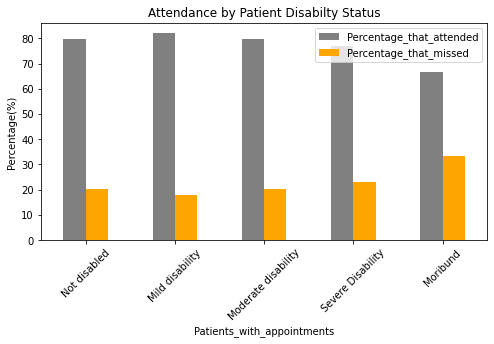

In [43]:
# Plot a bar chart to illustrate the findings
new_handicap.plot(kind='bar', x='Patients_with_appointments', y=['Percentage_that_attended', 'Percentage_that_missed'],rot=45, color=['grey','orange'], ylabel='Percentage(%)', figsize=(8,4), title='Attendance by Patient Disabilty Status');

> Generally, average attendance fell gradually  with increasing patient disability and was lowest amongst the most disabled category.
> However, proportionally, mildly disabled patients honoured their appointments the most -more than those patients without any disability.

### 5. What is the general patient age distribution? What is the age distribution among patients that honoured their appointments and those that did not?

In [44]:
#create my function for histogram plotting
def myHistPlot(data, color, title='', legend=''): 
    data.hist(figsize=(10,8), color=color, alpha=0.8);
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Number of Patients');
    plt.legend(legend)

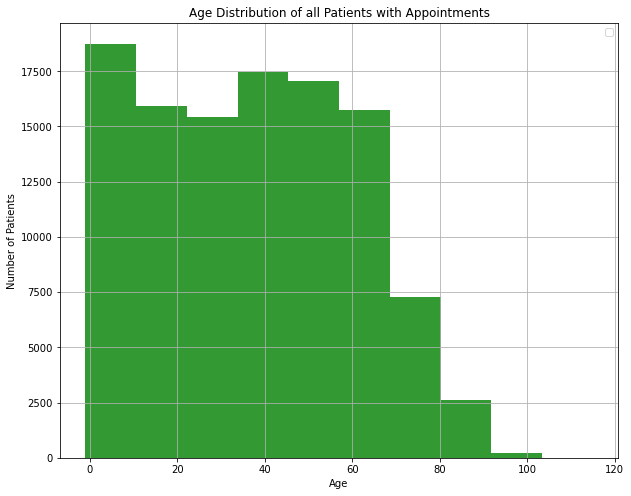

In [45]:
# Plot a Histogram to demonstrate the age distribution of all Patients with appointments
myHistPlot(data=df.Age, color='green', title='Age Distribution of all Patients with Appointments')


> In general, patients with appointments were by far mostly younger and middle-aged persons. The smaller the age, the more the number of patients. There were very few patients above the age of 90. 

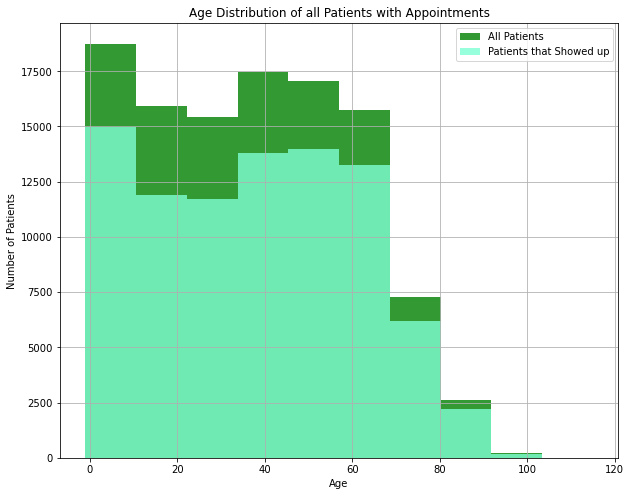

In [46]:
#compare general patient distribution by age to age distribution of patients that turned up for their appointments
legend=['All Patients', 'Patients that Showed up']
myHistPlot(data=clean_df.age, color='green')
myHistPlot(data=clean_df[clean_df['showed_up'] == 'Yes'].age, color = 'aquamarine', title='Age Distribution of all Patients with Appointments', legend=legend)

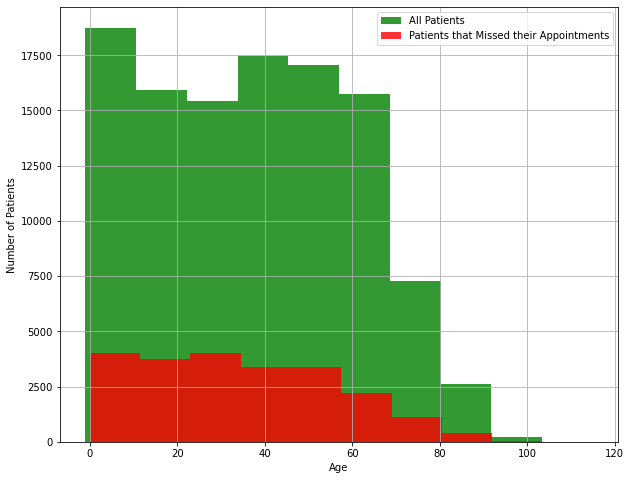

In [47]:
#compare general patient distribution by age to age distribution of patients that missed their appointments
legend=['All Patients', 'Patients that Missed their Appointments']
myHistPlot(data=clean_df.age, color='green')
myHistPlot(data=clean_df[clean_df['showed_up'] == 'No'].age, color = 'red', legend=legend)
#myHistPlot(data=clean_df[clean_df['showed_up'] == 'Yes'].age, color = 'aquamarine', title='Age Distribution of all Patients with Appointments vesus Age Distribution of Patients that Missed their Appointments', legend=legend)


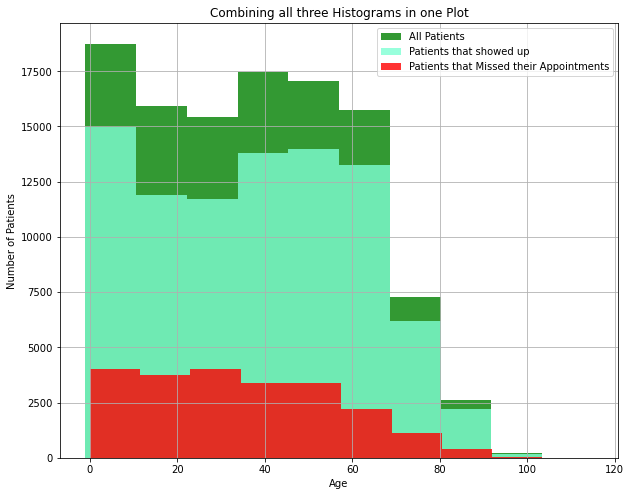

In [48]:
#compare the general age distribution with age distribution of both categories.
legend=['All Patients', 'Patients that showed up', 'Patients that Missed their Appointments']
myHistPlot(data=clean_df.age, color='green')
myHistPlot(data=clean_df[clean_df['showed_up'] == 'Yes'].age, color = 'aquamarine')
myHistPlot(data=clean_df[clean_df['showed_up'] == 'No'].age, color = 'red', title='Combining all three Histograms in one Plot', legend=legend)

> Majority of patients with appointments kept to their arrangements
> Younger patients generally visited the clinics more than older patients on their days of appointment.


<a id='conclusions'></a>
## Conclusions

##### Findings:

> **Limitations**: No statistical tests were done in this project, therefore these findings do not prove causation. However, there are several instances of correlation.

1. The vast majority of patients in this sample were not alcoholics, that is over 10,000 people. 
> Percentage attendance among non-alcoholics was about 0.05% higher compared to patients that were alcoholics. 
> Proportionally, there was no significant difference in compliance to appointments between the alcoholic group and the other patients. 

2. Attendance was up by almost 9% in the category of patients that were reminded of their appointments by SMS compared to those that were not reminded. 

3. There was a greater attendance rate among scholarship-holders compared to their non-scholarship holding counterparts.

4. Generally, average attendance fell gradually  with increasing patient disability and was lowest amongst the most disabled category.

5. In general, patients with appointments were by far mostly younger and middle-aged persons. The smaller the age, the more the number of patients. There were very few patients above the age of 90.



